In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import the data:

In [2]:
train_data = "data/train.csv"
test_data = "data/test.csv"

titanic_train_data = pd.read_csv(train_data)
titanic_test_data = pd.read_csv(test_data)

Inspecting the data:

In [3]:
titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic_train_data.shape

(891, 12)

Checking missing values:

In [7]:
titanic_train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Fill the missing values:

In [8]:
titanic_train_data['Age'] = titanic_train_data['Age'].fillna(titanic_train_data['Age'].median())
titanic_train_data['Embarked'] = titanic_train_data['Embarked'].fillna(titanic_train_data['Embarked'].mode()[0])

Check the updated data:

In [9]:
titanic_train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Feature Engineering:

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
# FamilySize = SibSp + Parch + 1
titanic_train_data['FamilySize'] = titanic_train_data['SibSp'] + titanic_train_data['Parch'] + 1

In [12]:
# IsAlone = 1 if FamilySize == 1, else 0
titanic_train_data['IsAlone'] = (titanic_train_data['FamilySize'] == 1).astype(int)


In [13]:
# Extract titles from names
titanic_train_data['Title'] = titanic_train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(titanic_train_data[['Name', 'Title']].head(10))

                                                Name   Title
0                            Braund, Mr. Owen Harris      Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...     Mrs
2                             Heikkinen, Miss. Laina    Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)     Mrs
4                           Allen, Mr. William Henry      Mr
5                                   Moran, Mr. James      Mr
6                            McCarthy, Mr. Timothy J      Mr
7                     Palsson, Master. Gosta Leonard  Master
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)     Mrs
9                Nasser, Mrs. Nicholas (Adele Achem)     Mrs


In [14]:
# Group rare titles into 'Rare'
title_counts = titanic_train_data['Title'].value_counts()
rare_titles = title_counts[title_counts < 10].index
titanic_train_data['Title'] = titanic_train_data['Title'].replace(rare_titles, 'Rare')

In [15]:
# Map titles to numerical values
title_mapping = { 'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4 }
titanic_train_data['Title'] = titanic_train_data['Title'].map(title_mapping)
print(titanic_train_data[['Name', 'Title']].head(10))

                                                Name  Title
0                            Braund, Mr. Owen Harris      0
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      2
2                             Heikkinen, Miss. Laina      1
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      2
4                           Allen, Mr. William Henry      0
5                                   Moran, Mr. James      0
6                            McCarthy, Mr. Timothy J      0
7                     Palsson, Master. Gosta Leonard      3
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)      2
9                Nasser, Mrs. Nicholas (Adele Achem)      2


In [16]:
titanic_train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'IsAlone',
       'Title'],
      dtype='object')

In [17]:
# Drop unnecessary columns
titanic_train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1, inplace=True)

In [18]:
titanic_train_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize',
       'IsAlone', 'Title'],
      dtype='object')

In [19]:
# Prepare features and target
X = titanic_train_data.drop('Survived', axis=1)
y = titanic_train_data['Survived']

In [20]:
# Define categorical and numerical features
categorical_cols = ['Sex', 'Embarked', 'Title']
numerical_cols = ['Age', 'Fare', 'FamilySize', 'IsAlone']

In [21]:
# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='if_binary'), categorical_cols)
    ]
)

In [22]:
# Create pipeline with Extra Trees classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ExtraTreesClassifier(n_estimators=100, random_state=42))
])

In [23]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Train model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'Fare', 'FamilySize',
                                                   'IsAlone']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Sex', 'Embarked',
                                                   'Title'])])),
                ('classifier', ExtraTreesClassifier(random_state=42))])

In [25]:
# Predict and evaluate
y_pred = pipeline.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.7877


,Feature,Importance
1,Fare,0.307937
0,Age,0.219566
4,Sex_male,0.129499
8,Title_0,0.121276
2,FamilySize,0.085465
10,Title_2,0.049623
9,Title_1,0.030268
3,IsAlone,0.013492
5,Embarked_C,0.012364
11,Title_3,0.010326


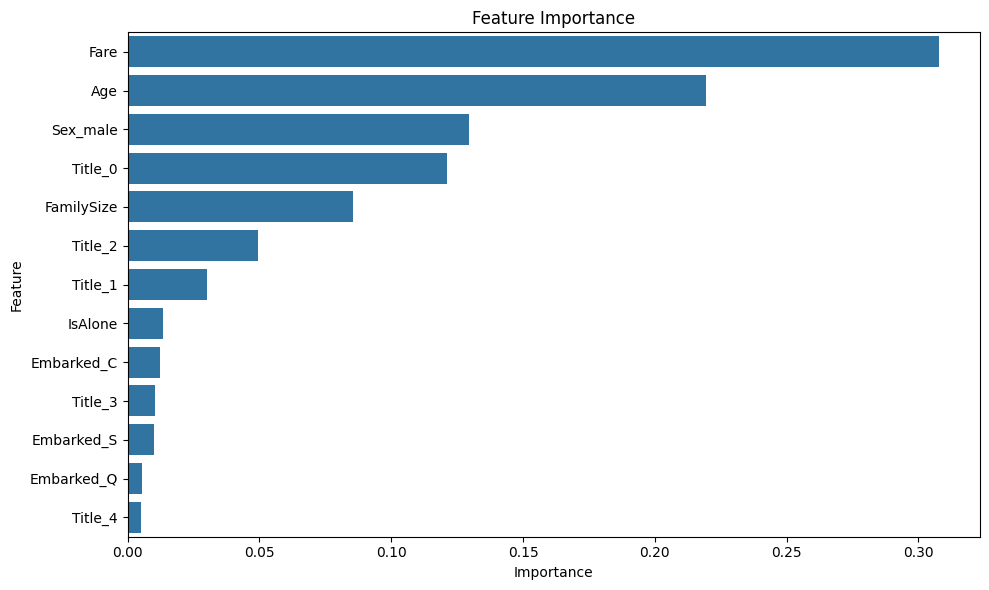

In [26]:
feature_importance = pipeline.named_steps['classifier'].feature_importances_
feature_names = numerical_cols + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols))
# Create DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)
display(feature_importance_df)
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [27]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82       105
           1       0.73      0.77      0.75        74

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.79      0.79      0.79       179



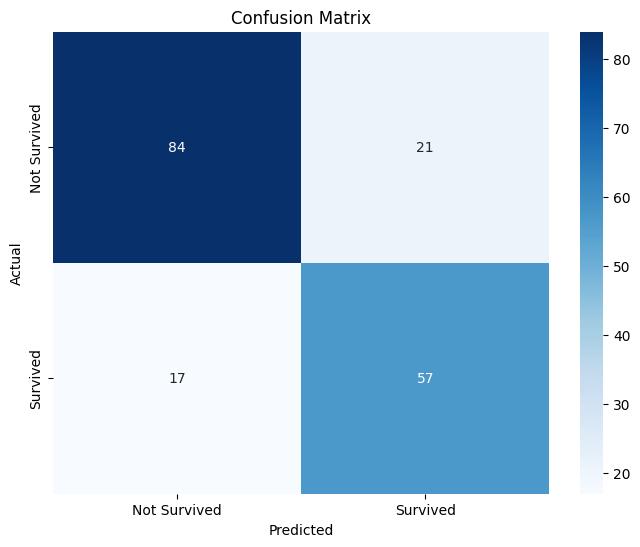

In [28]:
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not Survived", "Survived"],
    yticklabels=["Not Survived", "Survived"],
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
titanic_test_data['FamilySize'] = titanic_test_data['SibSp'] + titanic_test_data['Parch'] + 1
titanic_test_data['IsAlone'] = (titanic_test_data['FamilySize'] == 1).astype(int)
# Extract titles from names
titanic_test_data['Title'] = titanic_test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# Group rare titles into 'Rare'
title_counts = titanic_test_data['Title'].value_counts()
rare_titles = title_counts[title_counts < 10].index
titanic_test_data['Title'] = titanic_test_data['Title'].replace(rare_titles, 'Rare')
# Map titles to numerical values
title_mapping = { 'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Rare': 4 }
titanic_test_data['Title'] = titanic_test_data['Title'].map(title_mapping)
# Drop unnecessary columns
passenger_ids = titanic_test_data['PassengerId']
titanic_test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'], axis=1, inplace=True)
# Prepare features for prediction

In [30]:
predictions = pipeline.predict(titanic_test_data)
# Create submission DataFrame
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions
})
# Save submission to CSV
submission.to_csv('./data/submission.csv', index=False)